# Twitter Sentiment Analysis using NLTK
Coursera course

Next steps:
* Word chat not working
* Clean functions from Jupyter
* Build a visualization with the words:
https://www.coursera.org/learn/classification-vector-spaces-in-nlp/ungradedLab/13HKM/lab


Following a course at Coursera -- payed 49 USD!

* List of notebooks: https://uzpfirqi.coursera-apps.org/tree?
* Course pace: https://www.coursera.org/learn/classification-vector-spaces-in-nlp/ungradedLab/13HKM/visualizing-word-frequencies

In [1]:
# nlp
import nltk

# get data
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK

# drop punctuation
import re
import string

# stopwords
from nltk.corpus import stopwords

# handle arrays and dataframes
import numpy as np
import pandas as pd


# dataviz
import matplotlib.pyplot as plt            # library for visualization
import seaborn as sns

# pseudo-random number generator
import random

In [2]:
# home made preprocessing function
from data_pipeline.pre_processing_text.preprocess_string_list import preprocessing_list
from data_pipeline.pre_processing_text.preprocess_string_list import preprocessing_string

In [3]:
def df_sentiment(list_text, sentiment):
    """Returns a dataframe with a text and sentiment column"""
    df = pd.DataFrame()
    df['text'] = list_text
    df['sentiment'] = sentiment
    return df

# Loading and explore data

* The dataset contains 5000 positive and 5000 negative manually anoted tweets.
* It is balanced in order to simplify the desing of most computational methods that are required for sentiment analysis

In [4]:
# download sample twitter dataset.
# nltk.download('twitter_samples')

In [5]:
# LISTS
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [6]:
# DATAFRAME
df = df_sentiment(all_negative_tweets, 'negative').append(df_sentiment(all_positive_tweets, 'positive'))
df.head()

,text,sentiment
0,hopeless for tmr :(,negative
1,Everything in the kids section of IKEA is so c...,negative
2,@Hegelbon That heart sliding into the waste ba...,negative
3,"“@ketchBurning: I hate Japanese call him ""bani...",negative
4,"Dang starting next week I have ""work"" :(",negative


# Preprocessing

In [7]:
# english stopwords
sw = stopwords.words('english')

# new sources
# https://gist.github.com/sebleier/554280

In [8]:
# regex patterns to be dropped from the strings
dict_regex = {
    'hashtags': r'#(\w+)',
    # returns not only mentions, but
    # part of the email after the @
    'mentions': r'@(\w+)',
    'emails': r'',
    'links': r'https?:\/\/.*[\r\n]*',
    'remove_RT': '^RT[\s]+',
    'numbers': r'\d+',
    'symbols': r'',
    'punctionation2': '[^\w\s]',
    'punctionation': '[%s]' % re.escape(string.punctuation),
    'periods': '\.',
    'exclamation points': '\!',
    'question marks': '\?',
    'upper case words': '[A-Z][A-Z\d]+',
    # https://stackoverflow.com/questions/39536390/match-unicode-emoji-in-python-regex
    'emojis': '\d+(.*?)[\u263a-\U0001f645]',
    'upper case': '[A-Z][A-Z\d]+'
}

list_of_strings = df.text.to_list()

list_of_regex_values = list(dict_regex.values())

list_of_regex_keys = list(dict_regex.keys())

stopwords = ['above', 'all']

In [9]:
positive_clean = preprocessing_list(all_positive_tweets, list_of_regex_values, sw)
negative_clean = preprocessing_list(all_negative_tweets, list_of_regex_values, sw)

# Count number of words

In [11]:
from data_pipeline.pre_processing_text.dict_count_words import build_freqs
from data_pipeline.pre_processing_text.dict_count_words import build_freqs_coursera

In [12]:
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

In [13]:
counts = build_freqs(all_negative_tweets, labels, list_of_regex_values, stopwords)

In [52]:
len(counts)

5441

In [59]:
counts

{('hopeless', 1.0): 2,
 ('tmr', 1.0): 3,
 ('kid', 1.0): 20,
 ('ikea', 1.0): 1,
 ('cute', 1.0): 44,
 ('shame', 1.0): 18,
 ('month', 1.0): 22,
 ('heart', 1.0): 26,
 ('slide', 1.0): 1,
 ('waste', 1.0): 5,
 ('basket', 1.0): 1,
 ('hate', 1.0): 57,
 ('japanese', 1.0): 4,
 ('bani', 1.0): 2,
 ('dang', 1.0): 2,
 ('start', 1.0): 43,
 ('week', 1.0): 57,
 ('work', 1.0): 132,
 ('god', 1.0): 15,
 ('baby', 1.0): 47,
 ('face', 1.0): 20,
 ('smile', 1.0): 10,
 ('neighbour', 1.0): 1,
 ('motor', 1.0): 1,
 ('update', 1.0): 11,
 ('search', 1.0): 3,
 ('sialan', 1.0): 1,
 ('athabasca', 1.0): 1,
 ('glacier', 1.0): 1,
 ('good', 1.0): 161,
 ('mampg', 1.0): 2,
 ('idea', 1.0): 10,
 ('meet', 1.0): 38,
 ('mare', 1.0): 1,
 ('ivan', 1.0): 1,
 ('happy', 1.0): 26,
 ('trip', 1.0): 10,
 ('safe', 1.0): 6,
 ('tire', 1.0): 50,
 ('hahahah', 1.0): 3,
 ('knee', 1.0): 2,
 ('replacement', 1.0): 3,
 ('amp', 1.0): 93,
 ('day', 1.0): 149,
 ('ouch', 1.0): 3,
 ('relate', 1.0): 1,
 ('sweet', 1.0): 8,
 ('sour', 1.0): 2,
 ('kind', 1.0): 

# Visualize words

In [74]:
freqs = build_freqs_coursera(all_negative_tweets, labels)

In [75]:
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']


def count_words_list_coursera(freqs, keys):
    """
    Count the number of positive and negative words based on a list of words.
    
    Input:
        freqs: dict-like count frequencies "('month', 1.0): 22,"
        keys: list of words to be counted
    Output:
        list of lists counting the positive and negative words "[['happi', 0, 0], ['merri', 0, 0], ..."
    
    """
    # list representing our table of word counts.
    # each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
    data = []

    # loop through our selected words
    for word in keys:

        # initialize positive and negative counts
        pos = 0
        neg = 0

        # retrieve number of positive counts
        if (word, 1) in freqs:
            pos = freqs[(word, 1)]

        # retrieve number of negative counts
        if (word, 0) in freqs:
            neg = freqs[(word, 0)]

        # append the word counts to the table
        data.append([word, pos, neg])
    
    return data

In [76]:
w = count_words_list(counts, keys)

In [84]:
data = [['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

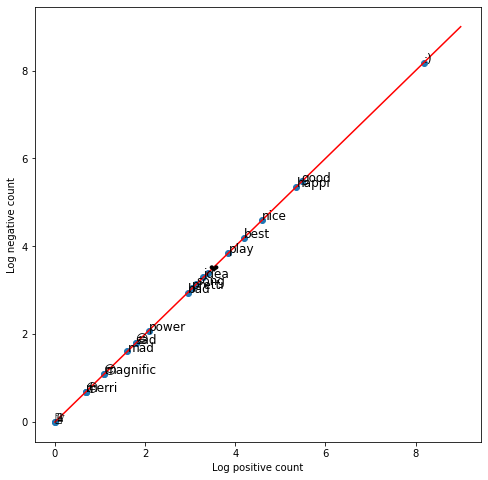

In [91]:
fig, ax = plt.subplots(figsize=(8,8))

# convert positive raw counts to logarithmic scale
# add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])

# same with the y axis
y = np.log([x[1] + 1 for x in data])

# plot a dot for each pair of words
ax.scatter(x, y)

# assign axis labels
plt.xlabel("Log positive count")
plt.ylabel("Log negative count")

# add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)
    
ax.plot([0, 9], [0, 9], color='red') #plot the read line that divide the 2 areas

plt.show()